In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter

%matplotlib inline

In [11]:
# Parametry
fs = 8000  # Hz
fc = 1000  # Hz
N = 51     # długość filtru (nieparzysta)

# Przekształcenie częstotliwości odcięcia na zakres [0, 1] (jako ułamek Nyquista)
norm_fc = fc / (fs / 2)

In [12]:
# Projektowanie filtru FIR z użyciem okna Hamminga
fir_coeffs = firwin(N, norm_fc, window='hamming')

In [13]:
# Generowanie sygnału: suma dwóch sinusoid (500 Hz i 1500 Hz)
t = np.arange(0, 1.0, 1/fs)  # 1 sekunda
x = np.sin(2 * np.pi * 500 * t) + np.sin(2 * np.pi * 1500 * t)

In [14]:
# Filtracja sygnału
y = lfilter(fir_coeffs, 1.0, x)

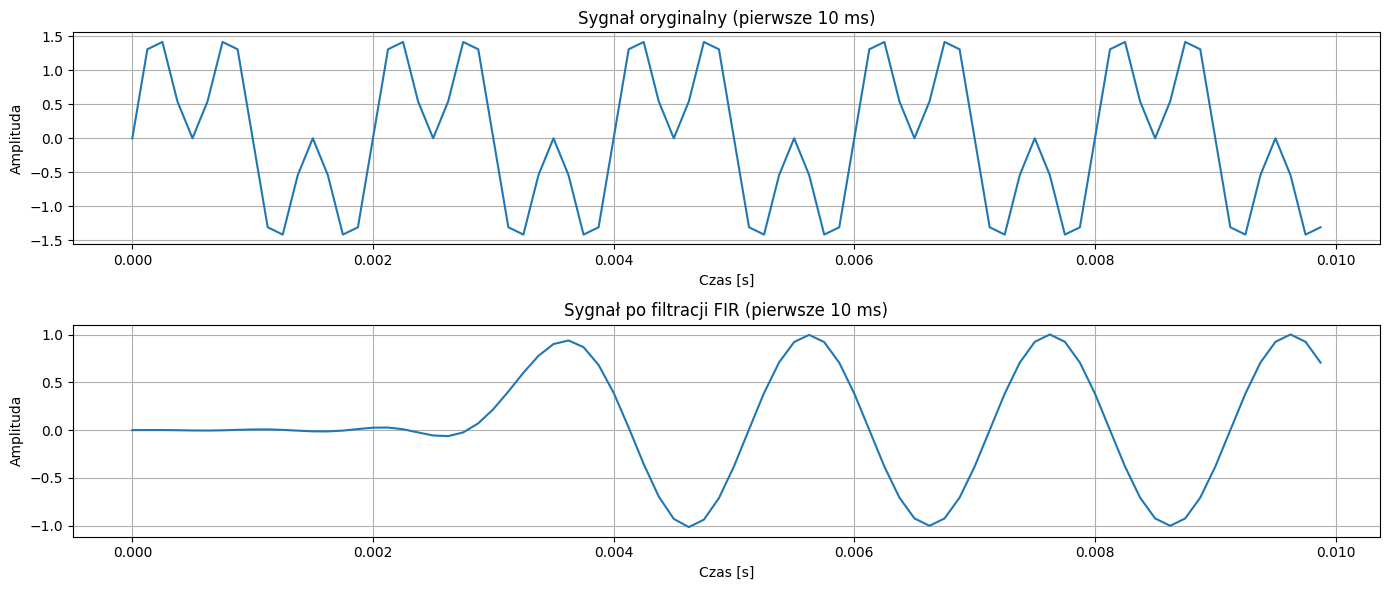

In [15]:
# Fragment sygnału do wyświetlenia (np. pierwsze 10 ms)
samples_to_plot = int(0.01 * fs)  # 0.01 sekundy = 10 ms

plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:samples_to_plot], x[:samples_to_plot])
plt.title('Sygnał oryginalny (pierwsze 10 ms)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t[:samples_to_plot], y[:samples_to_plot])
plt.title('Sygnał po filtracji FIR (pierwsze 10 ms)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

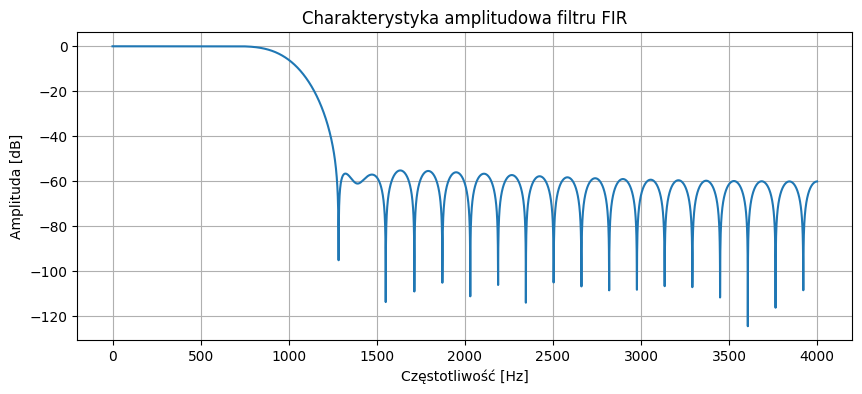

In [16]:
# Charakterystyka amplitudowa filtru
w, h = freqz(fir_coeffs, worN=8000)
plt.figure(figsize=(10, 4))
plt.plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h)))
plt.title('Charakterystyka amplitudowa filtru FIR')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.grid(True)
plt.show()

In [17]:
# Delta Encoding
signal = [3, 6, 9, 9, 12]
delta_encoded = [signal[0]] + [signal[i] - signal[i-1] for i in range(1, len(signal))]
print("Oryginalny sygnał:", signal)
print("Zakodowany (delta):", delta_encoded)

Oryginalny sygnał: [3, 6, 9, 9, 12]
Zakodowany (delta): [3, 3, 3, 0, 3]


In [18]:
# Delta Decoding
decoded = [delta_encoded[0]]
for i in range(1, len(delta_encoded)):
    decoded.append(decoded[-1] + delta_encoded[i])
print("Odkodowany sygnał:", decoded)

Odkodowany sygnał: [3, 6, 9, 9, 12]
